<a href="https://colab.research.google.com/github/fastaccurate/Deep_learning_to_predect_Substance_Abuse/blob/main/mlc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
d = pd.read_csv('smoking_driking_dataset_Ver01.csv')
d

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


### Data Preprocessing

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

### we can see above that all rows contain non null value so data is already in clean form

In [ ]:
d = d.dropna()
d

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


### Now our predection parameter is DRK_YN is in form of Y or N but ai models deal with numerical data so we will make a new corresponding column in dataframe whose value will be 0 (False) for No and 1 (True) for Yes.
### The values 0 and 1 are basically probailities of a person being drunk and obviously probabilitiy values can be 1 or 0,  because we know for sure that ground truth for each entry.
### Later we will see how this newly Created "dr" column containg probabilities will take fractional values as per model predections.

In [ ]:
d.insert(0,"dr", 0)
d

,dr,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,Male,35,170,75,90.0,1.0,1.0,1,1,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,0,Male,30,180,80,89.0,0.9,1.2,1,1,...,148,121,15.8,1,0.9,20,36,27,3,N
2,0,Male,40,165,75,91.0,1.2,1.5,1,1,...,74,104,15.8,1,0.9,47,32,68,1,N
3,0,Male,50,175,80,91.0,1.5,1.2,1,1,...,104,106,17.6,1,1.1,29,34,18,1,N
4,0,Male,50,165,60,80.0,1.0,1.2,1,1,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,Male,45,175,80,92.1,1.5,1.5,1,1,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,0,Male,35,170,75,86.0,1.0,1.5,1,1,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,0,Female,40,155,50,68.0,1.0,0.7,1,1,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,0,Male,25,175,60,72.0,1.5,1.0,1,1,...,73,53,14.5,1,0.8,21,14,17,1,N


In [ ]:
d["dr"] = d['DRK_YN'] == 'Y'

In [ ]:
d

,dr,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,True,Male,35,170,75,90.0,1.0,1.0,1,1,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,False,Male,30,180,80,89.0,0.9,1.2,1,1,...,148,121,15.8,1,0.9,20,36,27,3,N
2,False,Male,40,165,75,91.0,1.2,1.5,1,1,...,74,104,15.8,1,0.9,47,32,68,1,N
3,False,Male,50,175,80,91.0,1.5,1.2,1,1,...,104,106,17.6,1,1.1,29,34,18,1,N
4,False,Male,50,165,60,80.0,1.0,1.2,1,1,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,False,Male,45,175,80,92.1,1.5,1.5,1,1,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,False,Male,35,170,75,86.0,1.0,1.5,1,1,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,True,Female,40,155,50,68.0,1.0,0.7,1,1,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,False,Male,25,175,60,72.0,1.5,1.0,1,1,...,73,53,14.5,1,0.8,21,14,17,1,N


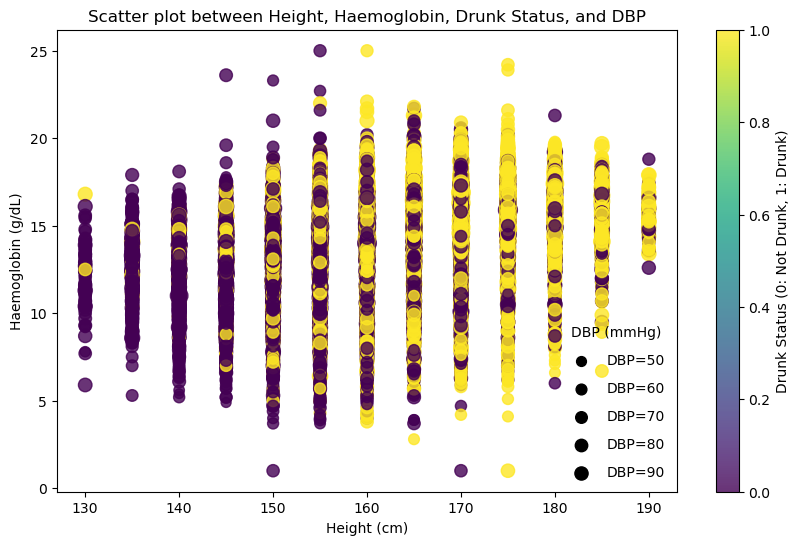

In [ ]:
import matplotlib.pyplot as plt

height = d["height"]  # Example heights in cm
haemoglobin = d["hemoglobin"]  # Example haemoglobin levels in g/dL
dbp = d["DBP"]  # Example diastolic blood pressure in mmHg
drunk_status = d["dr"]  # Example drunk status (0: not drunk, 1: drunk)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(height, haemoglobin, c=drunk_status, cmap='viridis', s=dbp, alpha=0.8)

# Adding labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Haemoglobin (g/dL)')
plt.title('Scatter plot between Height, Haemoglobin, Drunk Status, and DBP')

# Adding colorbar legend for drunk status
cbar = plt.colorbar()
cbar.set_label('Drunk Status (0: Not Drunk, 1: Drunk)')

# Adding a size legend for DBP
plt.scatter([], [], s=50, label='DBP=50', color='black')
plt.scatter([], [], s=60, label='DBP=60', color='black')
plt.scatter([], [], s=70, label='DBP=70', color='black')
plt.scatter([], [], s=80, label='DBP=80', color='black')
plt.scatter([], [], s=90, label='DBP=90', color='black')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='DBP (mmHg)')

# Show the plot
plt.show()


In [ ]:
d=d.drop(['sex', 'DRK_YN'], axis=1)

# EDA

### Analysing Correlation matrix to find out which and how much each parameter affect "dr" column

In [ ]:
cr=d.corr()
cr

,dr,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
dr,1.000000,-0.284587,0.374566,0.264282,0.092993,0.077379,0.074806,-0.058337,-0.058230,0.033149,...,0.042514,-0.043693,0.104398,0.299341,-0.003125,0.060798,0.039382,0.062908,0.205094,0.350784
age,-0.284587,1.000000,-0.398501,-0.195337,0.127170,-0.172096,-0.167684,0.203021,0.198693,0.265530,...,-0.104624,0.029497,0.043549,-0.173081,0.041497,0.022819,0.059408,-0.020506,0.017391,-0.126031
height,0.374566,-0.398501,1.000000,0.668823,0.263945,0.139141,0.138529,-0.081159,-0.082456,0.035030,...,-0.148599,-0.015450,0.137611,0.531898,0.002298,0.171256,0.039203,0.144842,0.162340,0.467317
weight,0.264282,-0.195337,0.668823,1.000000,0.637173,0.088901,0.088707,-0.044498,-0.045709,0.250770,...,-0.287688,0.067859,0.283774,0.499491,0.029281,0.153885,0.099652,0.276440,0.221881,0.366499
waistline,0.092993,0.127170,0.263945,0.637173,1.000000,0.004511,0.006158,0.033224,0.031012,0.272323,...,-0.253988,0.063416,0.249436,0.291730,0.043132,0.098421,0.096858,0.212267,0.186988,0.205485
sight_left,0.077379,-0.172096,0.139141,0.088901,0.004511,1.000000,0.307985,-0.039428,-0.040998,-0.035617,...,-0.004224,0.003013,0.010599,0.085896,-0.010253,0.020309,-0.005427,0.018815,0.013566,0.064194
sight_right,0.074806,-0.167684,0.138529,0.088707,0.006158,0.307985,1.000000,-0.040764,-0.038895,-0.033994,...,-0.006259,0.002155,0.012265,0.086847,-0.010897,0.021447,-0.004600,0.018920,0.016491,0.065051
hear_left,-0.058337,0.203021,-0.081159,-0.044498,0.033224,-0.039428,-0.040764,1.000000,0.536890,0.056065,...,-0.029464,-0.014621,0.002095,-0.036058,0.019754,0.015254,0.011283,-0.007907,0.002991,-0.021245
hear_right,-0.058230,0.198693,-0.082456,-0.045709,0.031012,-0.040998,-0.038895,0.536890,1.000000,0.057436,...,-0.028046,-0.013438,0.002155,-0.036703,0.018264,0.012959,0.010763,-0.008687,0.003548,-0.022330
SBP,0.033149,0.265530,0.035030,0.250770,0.272323,-0.035617,-0.033994,0.056065,0.057436,1.000000,...,-0.111772,0.033619,0.186003,0.166530,0.063518,0.062605,0.081478,0.117613,0.161434,0.084918


### clubing left and right 'sight' and 'hear' columns

In [ ]:
d["sight"]=(d["sight_left"]+d["sight_right"])/2
d["hear"]=(d["hear_left"]+d["hear_right"])/2

## Now from above correlation matrix we see each parameters affect quite differently "dr" column.So we filter the columns on basis of weightage and finally only the parameters which quantatively impact the predection variable are retained.
## DATA IS THE KING, DATA IS THE GOD.Believing in data rather than biases or prejudices whether a particular column will affect predection variable or no.Proceeding with further analysis

In [ ]:
d=d[["dr", "age","height","weight","waistline","sight","hear","DBP","triglyceride","hemoglobin","serum_creatinine","SGOT_ALT","gamma_GTP","SMK_stat_type_cd"]]

In [ ]:
d

,dr,age,height,weight,waistline,sight,hear,DBP,triglyceride,hemoglobin,serum_creatinine,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,True,35,170,75,90.0,1.00,1.0,80,92,17.1,1.0,35,40,1
1,False,30,180,80,89.0,1.05,1.0,82,121,15.8,0.9,36,27,3
2,False,40,165,75,91.0,1.35,1.0,70,104,15.8,0.9,32,68,1
3,False,50,175,80,91.0,1.35,1.0,87,106,17.6,1.1,34,18,1
4,False,50,165,60,80.0,1.10,1.0,82,104,13.8,0.8,12,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,False,45,175,80,92.1,1.50,1.0,80,132,15.0,1.0,36,27,1
991342,False,35,170,75,86.0,1.25,1.0,83,45,15.8,1.1,17,15,1
991343,True,40,155,50,68.0,0.85,1.0,70,157,14.3,0.8,27,17,3
991344,False,25,175,60,72.0,1.25,1.0,74,53,14.5,0.8,14,17,1


In [ ]:
cr=d.corr()

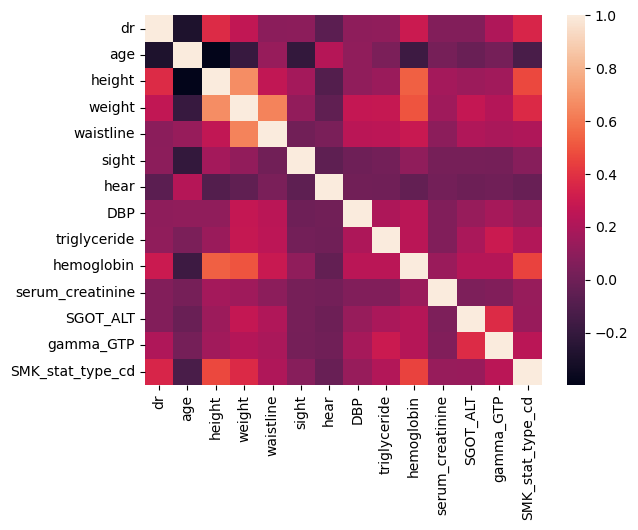

<Figure size 1000x600 with 0 Axes>

In [ ]:
hm = sns.heatmap(data=cr)

plt.figure(figsize=(10, 6))

# displaying the plotted heatmap
plt.show()

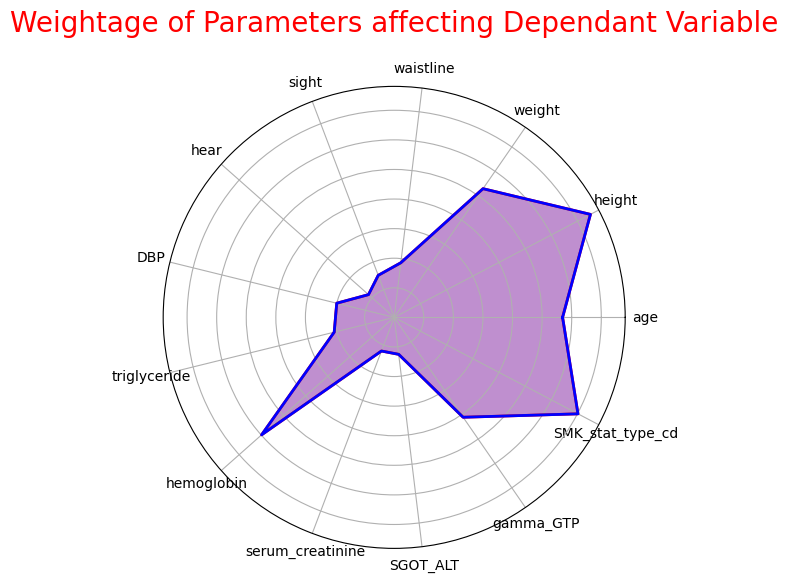

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters and their values
parameters = ['age', 'height', 'weight', 'waistline', 'sight', 'hear', 'DBP', 'triglyceride',
              'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']

values = [0.284587, 0.374566,0.264282,0.092993, 0.076,
          0.058, 0.1, 0.104398, 0.299341,
          0.060798, 0.062908, 0.205094, 0.350784]

# Define the dependent variable (dr)
dr_values = [0.284587, 0.374566,0.264282,0.092993, 0.076,
          0.058, 0.1, 0.104398, 0.299341,
          0.060798, 0.062908, 0.205094, 0.350784]

# Calculate angles for the radar plot
num_vars = len(parameters)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we "complete the loop" and append the start of the parameter
values += values[:1]
dr_values += dr_values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, dr_values, color='blue', alpha=0.25)
ax.plot(angles, dr_values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(parameters)

plt.title('Weightage of Parameters affecting Dependant Variable', size=20, color='red', y=1.1)

plt.show()


# Training and testing Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Preprocessing data for models

In [ ]:
x=d.iloc[: ,1:14].values
x

array([[ 35., 170.,  75., ...,  35.,  40.,   1.],
       [ 30., 180.,  80., ...,  36.,  27.,   3.],
       [ 40., 165.,  75., ...,  32.,  68.,   1.],
       ...,
       [ 40., 155.,  50., ...,  27.,  17.,   3.],
       [ 25., 175.,  60., ...,  14.,  17.,   1.],
       [ 50., 160.,  70., ...,  43.,  36.,   3.]])

In [ ]:
y=d.iloc[:,0].values
y

array([ True, False, False, ...,  True, False,  True])

## Scaling the data so that ai models percieve data correctly

In [ ]:
sc=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train[:10]

array([[ 0.52082124, -1.31899565, -1.85999739, -2.04125057,  0.04186745,
        -0.20404433, -1.11793482, -0.47158891,  0.10723123, -0.32674556,
        -0.1035881 , -0.35914877, -0.743047  ],
       [-1.24223454,  1.91311106,  0.53643261, -0.35645801,  1.06441836,
        -0.20404433,  1.40907851, -0.42250491,  1.05352339,  0.28434569,
         0.38367724,  0.49320548,  0.47878397],
       [ 1.22604355, -1.31899565, -0.26237739,  0.73865715, -0.26489782,
        -0.20404433,  1.61123958, -0.38323771, -0.58671634, -0.32674556,
         0.30871334,  0.09676164, -0.743047  ],
       [-1.5948457 ,  0.2970577 , -1.46059239, -0.86189578,  0.04186745,
        -0.20404433, -0.10712949, -0.49122251, -0.01894105, -0.53044264,
        -0.59085344, -0.37897097, -0.743047  ],
       [-0.53701223, -1.31899565, -1.06118739, -1.28309392,  1.57569381,
        -0.20404433,  0.39827318, -0.55994012, -0.71288863, -0.73413972,
        -0.36596174, -0.43843754, -0.743047  ],
       [ 1.93126586, -1.857680

# Logistic Regression

In [ ]:
%%time
%load_ext memory_profiler
%memit

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)

peak memory: 845.30 MiB, increment: 0.06 MiB
CPU times: total: 3.61 s
Wall time: 2.8 s


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.71      0.74      0.72     98887
        True       0.73      0.69      0.71     99383

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270

[[73022 25865]
 [30495 68888]]


# Decision Tree Classifier

In [ ]:
%%time
%memit
t=DecisionTreeClassifier()
t.fit(x_train,y_train)
y_pred=t.predict(x_test)

peak memory: 847.88 MiB, increment: -0.00 MiB
CPU times: total: 16.7 s
Wall time: 23.2 s


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.63      0.63      0.63     98887
        True       0.64      0.63      0.63     99383

    accuracy                           0.63    198270
   macro avg       0.63      0.63      0.63    198270
weighted avg       0.63      0.63      0.63    198270

[[62690 36197]
 [36312 63071]]


# Random Forest Classifier

In [ ]:
%%time
%memit
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

peak memory: 868.13 MiB, increment: 0.00 MiB
CPU times: total: 3min 37s
Wall time: 4min 11s


In [ ]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

       False       0.72      0.72      0.72     98887
        True       0.72      0.72      0.72     99383

    accuracy                           0.72    198270
   macro avg       0.72      0.72      0.72    198270
weighted avg       0.72      0.72      0.72    198270

[[71436 27451]
 [27531 71852]]


# Neural Network

In [ ]:
%%time
%memit
mlpc=MLPClassifier()
mlpc.fit(x_train,y_train)
pred_mlpc=mlpc.predict(x_test)

peak memory: 3026.05 MiB, increment: 0.18 MiB
CPU times: total: 6min 1s
Wall time: 1min 55s


In [ ]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

       False       0.73      0.72      0.72     98887
        True       0.72      0.74      0.73     99383

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270

[[70995 27892]
 [26115 73268]]


# Naive Bayes

In [ ]:
%%time
%memit
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb = gnb.predict(x_test)

peak memory: 3026.97 MiB, increment: 0.00 MiB
CPU times: total: 578 ms
Wall time: 1.73 s


In [ ]:
print(classification_report(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))

              precision    recall  f1-score   support

       False       0.67      0.74      0.71     98887
        True       0.71      0.65      0.68     99383

    accuracy                           0.69    198270
   macro avg       0.69      0.69      0.69    198270
weighted avg       0.69      0.69      0.69    198270

[[73202 25685]
 [35277 64106]]


# K Neighbors Classifier

In [ ]:
%%time
%memit
classifier_knn=KNeighborsClassifier(5)
classifier_knn.fit(x_train,y_train)
y_pred=classifier_knn.predict(x_test)

peak memory: 3027.55 MiB, increment: 0.00 MiB
CPU times: total: 23min 2s
Wall time: 27min 16s


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.69      0.67      0.68     98887
        True       0.68      0.69      0.69     99383

    accuracy                           0.68    198270
   macro avg       0.68      0.68      0.68    198270
weighted avg       0.68      0.68      0.68    198270

[[66533 32354]
 [30350 69033]]


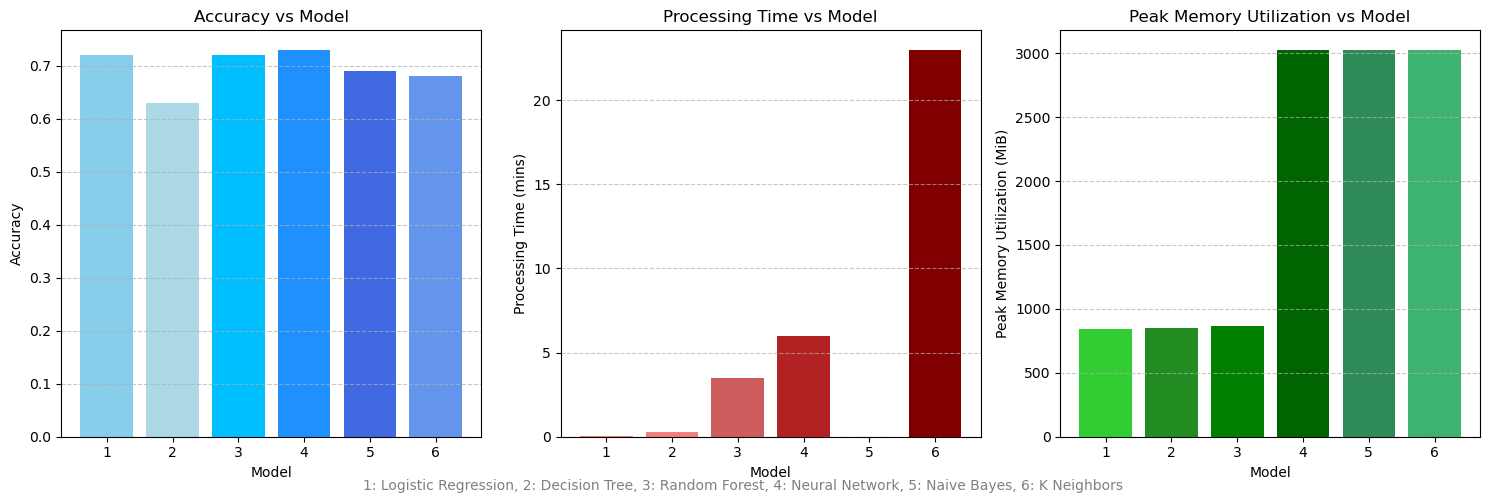

In [ ]:
import matplotlib.pyplot as plt

# Define data
model_numbers = [1, 2, 3, 4, 5, 6]

accuracy_scores = [0.72, 0.63, 0.72, 0.73, 0.69, 0.68]
processing_times = [0.06, 0.279, 3.5, 6, 0.0096, 23]
peak_memory_utilization = [845.3, 847.88, 868.13, 3026.05, 3026.97, 3027.55]

# Create bar graphs
plt.figure(figsize=(15, 5))

# Bar graph for Accuracy
plt.subplot(1, 3, 1)
plt.bar(model_numbers, accuracy_scores, color=['skyblue', 'lightblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'cornflowerblue'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph for Processing Time
plt.subplot(1, 3, 2)
plt.bar(model_numbers, processing_times, color=['salmon', 'lightcoral', 'indianred', 'firebrick', 'darkred', 'maroon'])
plt.xlabel('Model')
plt.ylabel('Processing Time (mins)')
plt.title('Processing Time vs Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bar graph for Peak Memory Utilization
plt.subplot(1, 3, 3)
plt.bar(model_numbers, peak_memory_utilization, color=['limegreen', 'forestgreen', 'green', 'darkgreen', 'seagreen', 'mediumseagreen'])
plt.xlabel('Model')
plt.ylabel('Peak Memory Utilization (MiB)')
plt.title('Peak Memory Utilization vs Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add line indicating model numbers
plt.figtext(0.5, 0.01, '1: Logistic Regression, 2: Decision Tree, 3: Random Forest, 4: Neural Network, 5: Naive Bayes, 6: K Neighbors ', ha='center', fontsize=10, color='gray')


plt.tight_layout()


plt.show()


# Models Evaluation

Accuracy of all models is around 0.70 lowest being 0.63 of Decision Tree and highest 0.73 for Neural Networks. So any model whose accuracy is above 0.70 is acceptable. When model accuracies are same, Time consumption and memory utilisation Play a key role in deciding the model.The processing time and peak memory utilisation vary significantly from model to model.

lowest processing time:  578ms for Naive Bayes, 3.61s for Logistic Regression    

highest processing time: 23 mins for K Neighbors, 6mins for Neural Networks

min memory:  850 Mib for Logistic Regression,Decesion Tree,Random Forest                                                      

max memory:   3025 Mib for Neural Network,Naive Bayes,K Neighbors

If we look at Logistic Regression model its accuracy being 0.71 ,  time:3.61s ,  memory:868.09 MiB so it is most optimal model which balances all parameters accuracy, time, and memory. It is one of the least memory consuming and fastest ml model with decent accuracy. So for given dataset and datasets similar to one above Logistic Regression is Recommended.

In fact according to Research studies conducted by GOOGLE, accuracy of Linear Regression trained on large databases compared to more complex model on smaller training databases was much more higher and predictions were quite accurate. So study suggested that training simple models like logistic regression on HyperLarge Bigdata will make model more accurate than training complicated time and memory consuming models on smaller datasets.

But if accuracy is of utmost importance Neural Networks which employ several interconnected layers to develop learning are most accurate. For computer vision and image processing DEEP LEARNING and convolutional neural network (CNN) are high accuracy deep intelligence models.
